<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/imdb_reviews_GRU_LSTM_CONV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import IMDB dataset

In [1]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS354BG/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS354BG/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteS354BG/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Split dataset into train and test sets

In [2]:
train_data, test_data = imdb['train'], imdb['test']

## Extract sentences and labels for train and test datasets

In [3]:
training_sentences = []
training_labels = []
for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

test_sentences = []
test_labels = []
for s, l in test_data:
  test_sentences.append(s.numpy().decode('utf8'))
  test_labels.append(l.numpy())

## Convert labels from list to numpy array

In [4]:
import numpy as np

training_labels_final = np.array(training_labels)
test_labels_final = np.array(test_labels) 

## Tokenize and pad the training sentences

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Hyperparameters
vocab_size = 10000
oov_tok = '<OOV>'
trunc_type = 'post'
max_length = 120

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)

from tensorflow.keras.preprocessing.sequence import pad_sequences
## pad the sequences
padded = pad_sequences(sequences, truncating=trunc_type, maxlen=max_length)

## tokenize and pad the test sentences

In [6]:
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_pad = pad_sequences(test_seq, truncating=trunc_type, maxlen=max_length)

## First model definition with Gated Recurrent Unit


In [7]:
import tensorflow as tf
embedding_dim = 64

model_1 = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                                     tf.keras.layers.Dense(6, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 64)           640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                18816     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 659,213
Trainable params: 659,213
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(padded, training_labels_final, epochs=50, validation_data=(test_pad, test_labels_final),verbose=2)

Epoch 1/50
782/782 - 24s - loss: 0.4858 - accuracy: 0.7436 - val_loss: 0.3971 - val_accuracy: 0.8208
Epoch 2/50
782/782 - 14s - loss: 0.2831 - accuracy: 0.8846 - val_loss: 0.4036 - val_accuracy: 0.8152
Epoch 3/50
782/782 - 14s - loss: 0.1971 - accuracy: 0.9235 - val_loss: 0.4427 - val_accuracy: 0.8234
Epoch 4/50
782/782 - 14s - loss: 0.1197 - accuracy: 0.9567 - val_loss: 0.5363 - val_accuracy: 0.8140
Epoch 5/50
782/782 - 14s - loss: 0.0667 - accuracy: 0.9773 - val_loss: 0.7362 - val_accuracy: 0.8138
Epoch 6/50
782/782 - 14s - loss: 0.0401 - accuracy: 0.9865 - val_loss: 0.8056 - val_accuracy: 0.8103
Epoch 7/50
782/782 - 14s - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.8850 - val_accuracy: 0.8095
Epoch 8/50
782/782 - 14s - loss: 0.0151 - accuracy: 0.9950 - val_loss: 1.1279 - val_accuracy: 0.8088
Epoch 9/50
782/782 - 14s - loss: 0.0193 - accuracy: 0.9936 - val_loss: 1.0175 - val_accuracy: 0.7986
Epoch 10/50
782/782 - 14s - loss: 0.0140 - accuracy: 0.9954 - val_loss: 1.1533 - val_accura

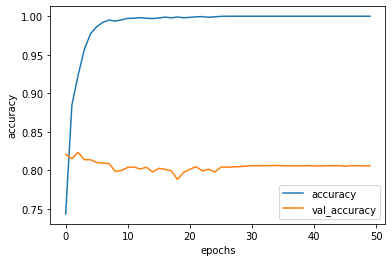

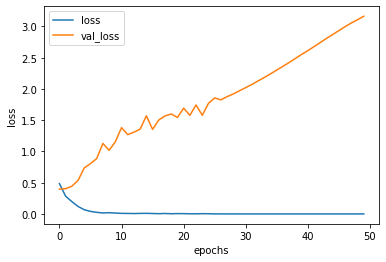

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_1, 'accuracy')
plot_graphs(history_1, 'loss')

## Second model definition with LSTM


In [9]:
import tensorflow as tf
embedding_dim = 64

model_2 = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                                     tf.keras.layers.Dense(6, activation='relu'),
                                     tf.keras.layers.Dense(1, activation='sigmoid')])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 665,229
Trainable params: 665,229
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(padded, training_labels_final, epochs=50, validation_data=(test_pad, test_labels_final),verbose=2)

Epoch 1/50
782/782 - 18s - loss: 0.4846 - accuracy: 0.7600 - val_loss: 0.4372 - val_accuracy: 0.8015
Epoch 2/50
782/782 - 14s - loss: 0.2973 - accuracy: 0.8797 - val_loss: 0.4022 - val_accuracy: 0.8246
Epoch 3/50
782/782 - 14s - loss: 0.2246 - accuracy: 0.9129 - val_loss: 0.4395 - val_accuracy: 0.8185
Epoch 4/50
782/782 - 15s - loss: 0.1725 - accuracy: 0.9342 - val_loss: 0.5326 - val_accuracy: 0.8150
Epoch 5/50
782/782 - 14s - loss: 0.1330 - accuracy: 0.9508 - val_loss: 0.6143 - val_accuracy: 0.8045
Epoch 6/50
782/782 - 14s - loss: 0.1045 - accuracy: 0.9632 - val_loss: 0.7604 - val_accuracy: 0.8087
Epoch 7/50
782/782 - 15s - loss: 0.0601 - accuracy: 0.9797 - val_loss: 0.7032 - val_accuracy: 0.8000
Epoch 8/50
782/782 - 14s - loss: 0.0583 - accuracy: 0.9805 - val_loss: 0.7993 - val_accuracy: 0.7986
Epoch 9/50
782/782 - 14s - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.9435 - val_accuracy: 0.8024
Epoch 10/50
782/782 - 14s - loss: 0.0503 - accuracy: 0.9823 - val_loss: 0.8791 - val_accura

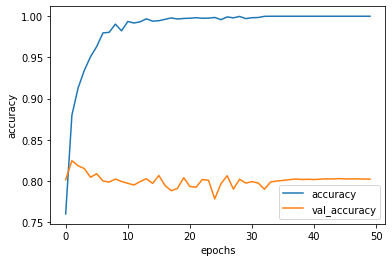

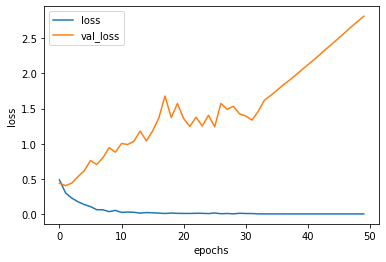

In [14]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_2, 'accuracy')
plot_graphs(history_2, 'loss')

## Third model definition with CONV1D

In [15]:
import tensorflow as tf
embedding_dim = 64

model_3 = tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                                      tf.keras.layers.Conv1D(128, 5, activation='relu'),
                                      tf.keras.layers.GlobalAveragePooling1D(),
                                      tf.keras.layers.Dense(6, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 681,869
Trainable params: 681,869
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history_3 = model_2.fit(padded, training_labels_final, epochs=50, validation_data=(test_pad, test_labels_final),verbose=2)

Epoch 1/50
782/782 - 14s - loss: 4.0361e-08 - accuracy: 1.0000 - val_loss: 2.8910 - val_accuracy: 0.8020
Epoch 2/50
782/782 - 14s - loss: 2.7319e-08 - accuracy: 1.0000 - val_loss: 2.9635 - val_accuracy: 0.8020
Epoch 3/50
782/782 - 14s - loss: 1.8643e-08 - accuracy: 1.0000 - val_loss: 3.0322 - val_accuracy: 0.8021
Epoch 4/50
782/782 - 14s - loss: 1.2921e-08 - accuracy: 1.0000 - val_loss: 3.0962 - val_accuracy: 0.8022
Epoch 5/50
782/782 - 14s - loss: 9.0250e-09 - accuracy: 1.0000 - val_loss: 3.1698 - val_accuracy: 0.8015
Epoch 6/50
782/782 - 14s - loss: 6.4403e-09 - accuracy: 1.0000 - val_loss: 3.2261 - val_accuracy: 0.8018
Epoch 7/50
782/782 - 14s - loss: 4.6560e-09 - accuracy: 1.0000 - val_loss: 3.2894 - val_accuracy: 0.8017
Epoch 8/50
782/782 - 14s - loss: 3.4200e-09 - accuracy: 1.0000 - val_loss: 3.3499 - val_accuracy: 0.8013
Epoch 9/50
782/782 - 14s - loss: 2.5778e-09 - accuracy: 1.0000 - val_loss: 3.4033 - val_accuracy: 0.8008
Epoch 10/50
782/782 - 14s - loss: 1.9994e-09 - accuracy

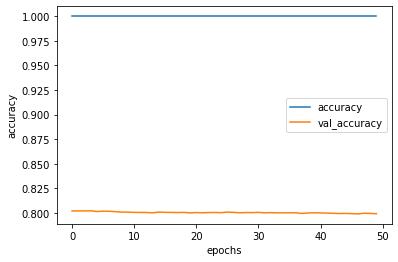

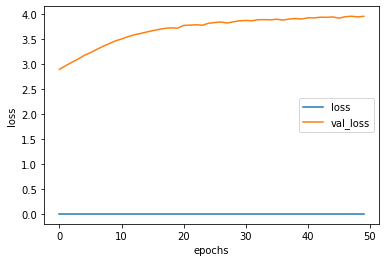

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_3, 'accuracy')
plot_graphs(history_3, 'loss')